<a href="https://colab.research.google.com/github/poorya99/opencv/blob/main/noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 [==============================] - 46s 8ms/step - loss: 0.2615 - val_loss: 0.1175
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1165 - val_loss: 0.1102
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1103 - val_loss: 0.1068
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - val_loss: 0.1051
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1049 - val_loss: 0.1028
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1031 - val_loss: 0.1014
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1019 - val_loss: 0.1002
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1007 - val_loss: 0.0996
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0996 - val_loss: 0.0987
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0990 - val_loss: 0.098

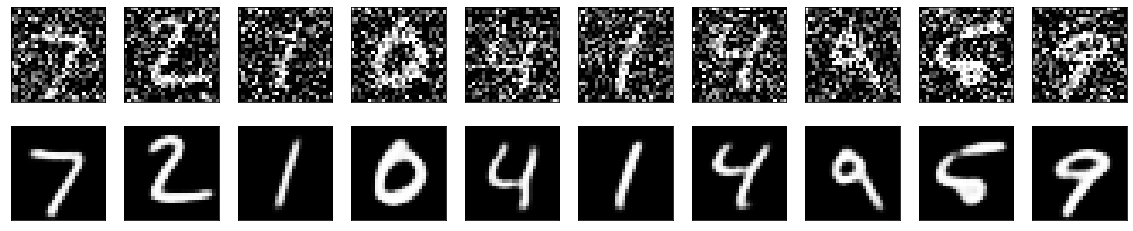

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 24 02:02:15 2017

@author: FaraDars
"""

from keras import layers, optimizers, losses
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
try:
  # pydot-ng is a fork of pydot that is better maintained.
  import pydot_ng as pydot
except ImportError:
  # pydotplus is an improved version of pydot
  try:
    import pydotplus as pydot
  except ImportError:
    # Fall back on pydot if necessary.
    try:
      import pydot
    except ImportError:
      pydot = None
# from keras.utils import plot_model

epochs = 10
batch_size = 128


#===============================================================================
# Prepare data

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#===============================================================================
# Create Layers + Model

input_img = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)



# plot_model(autoencoder, to_file='AE_model.png')

autoencoder.compile(optimizer=optimizers.Adam(), loss=losses.binary_crossentropy)

#===============================================================================
# Train the Model

autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

#===============================================================================
# Predict + Visualization

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
